In [124]:
import math
from scipy import stats
from scipy.stats import norm

import numpy as np

from tqdm import tqdm

# for inline plots in jupyter
%matplotlib inline 
import matplotlib.pyplot as plt # import matplotlib

from IPython.display import Math, Latex # for latex equations
from IPython.core.display import Image # for displaying images

from statistics import mean # importing mean()

import seaborn as sns # import seaborn
sns.set(color_codes=True) # settings for seaborn plotting style

sns.set(rc={'figure.figsize':(15,5)}) # settings for seaborn plot sizes

In [59]:
def get_db(p, N):
    v = norm.rvs(size=N, loc=0, scale=1)
    z = norm.rvs(size=N, loc=0, scale=1)
    e = norm.rvs(size=N, loc=0, scale=1)
    x = p*z + v
    db = np.divide(z@e, z@x)
    return db
    

In [65]:
rep_n = 10000
rho = [0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1, 0.13, 0.16, 0.2, 0.25, 0.3, 0.4]

In [125]:
simulation = dict()
for p in rho:
    print(str(p))
    simulation[str(p)] = [math.sqrt(N)*p*get_db(p=p, N=N) for i in tqdm(list(range(1, rep_n+1)))]

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3066.21it/s]


In [115]:
def get_plot(p):
    data = simulation[str(p)]
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    fig = plt.figure()
    ax = fig.add_subplot(122)
    ax.plot(data_sorted, prob)

    data = np.random.randn(10000)
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, prob)

    ax.legend(['rho='+str(p), 'Normal(0,1)'])

    plt.xlim(-4, 4)

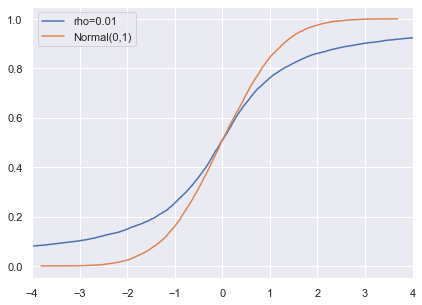

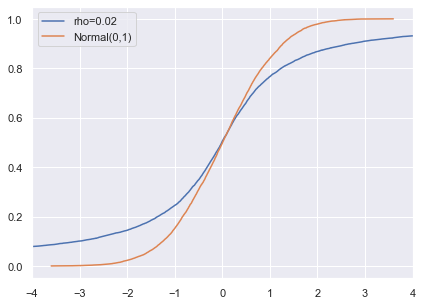

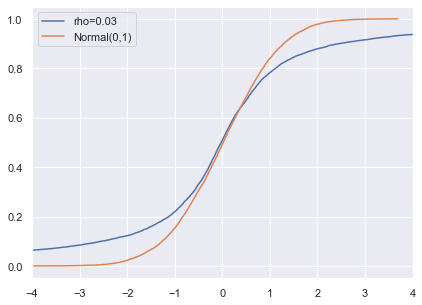

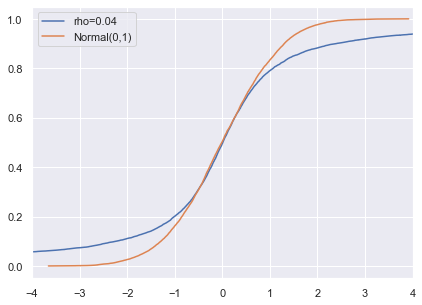

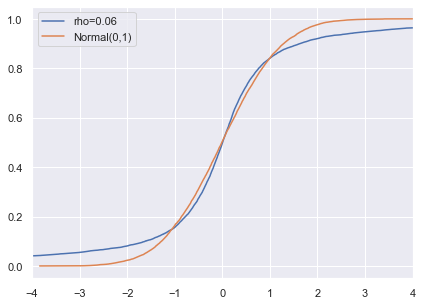

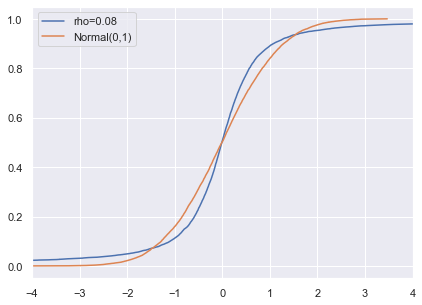

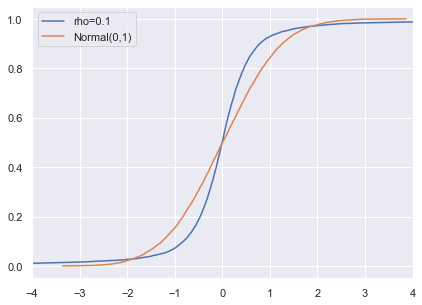

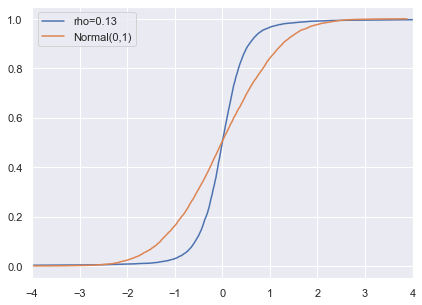

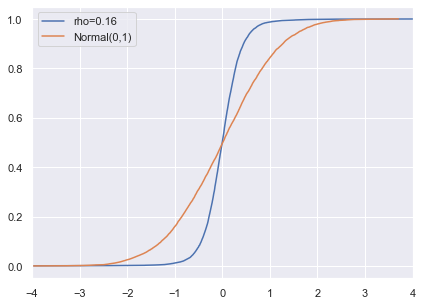

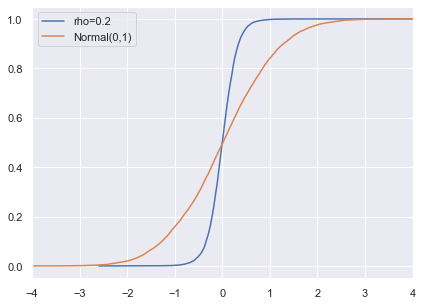

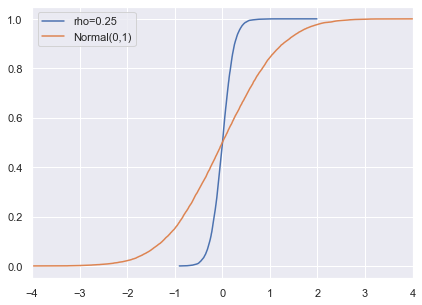

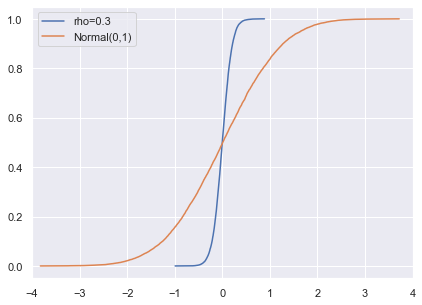

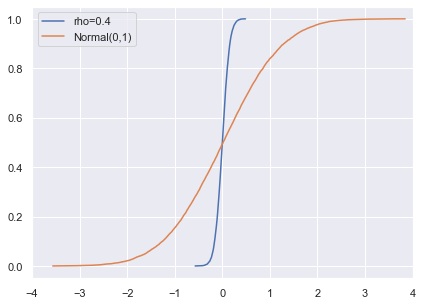

In [119]:
for p in rho:
    get_plot(p)

In [131]:
Ns = [100, 400,900]
Ks = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8]

In [134]:
simulation = dict()
for n in Ns:
    for k in Ks:
        p = k/math.sqrt(n)
        print(str(p))
        simulation[(str(n), str(k))] = [math.sqrt(n)*p*get_db(p=p, N=n) for i in tqdm(list(range(1, rep_n+1)))]

  3%|██▎                                                                         | 311/10000 [00:00<00:03, 3079.25it/s]

0.05


  7%|█████▌                                                                      | 729/10000 [00:00<00:03, 2891.37it/s]

0.1


  5%|███▉                                                                        | 523/10000 [00:00<00:01, 5229.93it/s]

0.15


  4%|██▊                                                                         | 370/10000 [00:00<00:02, 3663.53it/s]

0.2


  3%|██▍                                                                         | 315/10000 [00:00<00:03, 3118.81it/s]

0.25


  3%|██▎                                                                         | 300/10000 [00:00<00:03, 2970.40it/s]

0.3


  4%|███▏                                                                        | 427/10000 [00:00<00:04, 2124.85it/s]

0.35


  3%|██                                                                          | 275/10000 [00:00<00:03, 2722.86it/s]

0.4


  3%|██                                                                          | 277/10000 [00:00<00:03, 2759.99it/s]

0.45


  2%|█▍                                                                          | 194/10000 [00:00<00:05, 1939.95it/s]

0.5


  2%|█▊                                                                          | 245/10000 [00:00<00:07, 1233.39it/s]

0.6


  4%|██▊                                                                         | 370/10000 [00:00<00:02, 3683.06it/s]

0.7


  2%|█▋                                                                          | 227/10000 [00:00<00:04, 2258.23it/s]

0.8


  1%|█                                                                           | 142/10000 [00:00<00:07, 1405.74it/s]

0.025


  5%|███▋                                                                        | 477/10000 [00:00<00:02, 4727.13it/s]

0.05


  4%|██▊                                                                         | 372/10000 [00:00<00:02, 3683.45it/s]

0.075


  3%|██▏                                                                         | 285/10000 [00:00<00:03, 2849.98it/s]

0.1


  9%|███████                                                                     | 931/10000 [00:00<00:01, 4722.22it/s]

0.125


  9%|███████                                                                     | 932/10000 [00:00<00:01, 4651.71it/s]

0.15


  3%|██▍                                                                         | 325/10000 [00:00<00:03, 3217.95it/s]

0.175


  5%|███▌                                                                        | 467/10000 [00:00<00:02, 4628.59it/s]

0.2


  5%|███▋                                                                        | 482/10000 [00:00<00:01, 4819.98it/s]

0.225


  2%|█▍                                                                          | 182/10000 [00:00<00:05, 1802.03it/s]

0.25


  2%|█▊                                                                          | 245/10000 [00:00<00:04, 2425.80it/s]

0.3


  2%|█▌                                                                          | 204/10000 [00:00<00:05, 1854.52it/s]

0.35


  5%|███▌                                                                        | 471/10000 [00:00<00:04, 2191.05it/s]

0.4


  4%|██▋                                                                         | 360/10000 [00:00<00:02, 3591.77it/s]

0.016666666666666666


  8%|█████▉                                                                      | 781/10000 [00:00<00:02, 3971.48it/s]

0.03333333333333333


  6%|████▊                                                                       | 639/10000 [00:00<00:03, 2924.30it/s]

0.05


  4%|██▊                                                                         | 378/10000 [00:00<00:02, 3752.30it/s]

0.06666666666666667


  2%|█▏                                                                          | 162/10000 [00:00<00:06, 1603.95it/s]

0.08333333333333333


  2%|█▎                                                                          | 179/10000 [00:00<00:05, 1789.16it/s]

0.1


  7%|█████▌                                                                      | 732/10000 [00:00<00:02, 3639.28it/s]

0.11666666666666667


  4%|██▉                                                                         | 391/10000 [00:00<00:02, 3907.04it/s]

0.13333333333333333


  3%|██▋                                                                         | 347/10000 [00:00<00:02, 3452.15it/s]

0.15


  7%|█████                                                                       | 667/10000 [00:00<00:02, 3174.38it/s]

0.16666666666666666


  4%|███▎                                                                        | 430/10000 [00:00<00:04, 2161.28it/s]

0.2


  4%|██▋                                                                         | 360/10000 [00:00<00:02, 3564.54it/s]

0.23333333333333334


  4%|██▋                                                                         | 355/10000 [00:00<00:02, 3510.57it/s]

0.26666666666666666


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3596.77it/s]


In [136]:
def get_plot_3(k, n):
    data = simulation[(str(n), str(k))]
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    fig = plt.figure()
    ax = fig.add_subplot(122)
    ax.plot(data_sorted, prob)

    data = np.random.randn(10000)
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, prob)

    ax.legend(['k='+str(k)+' & N='+str(n), 'Normal(0,1)'])

    plt.xlim(-4, 4)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Anac

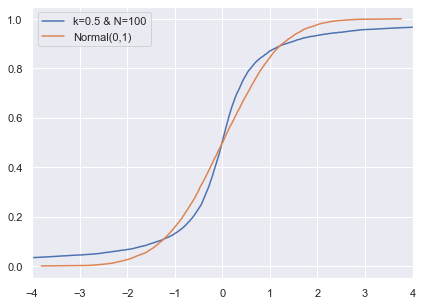

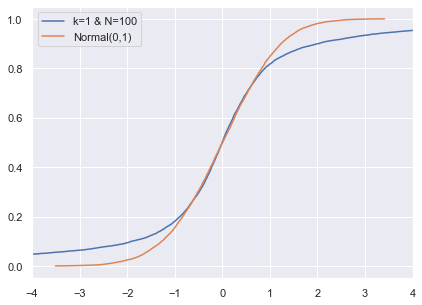

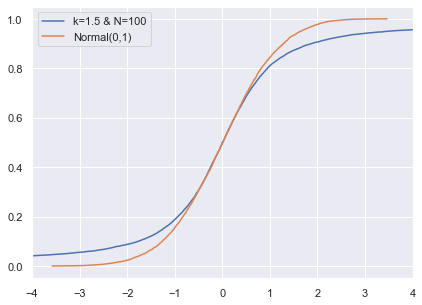

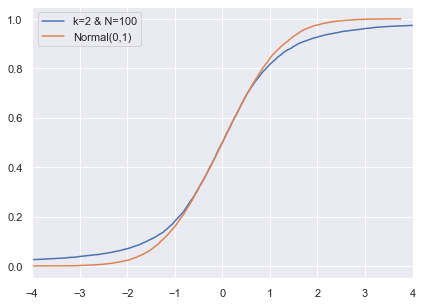

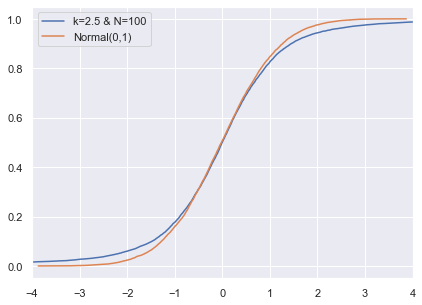

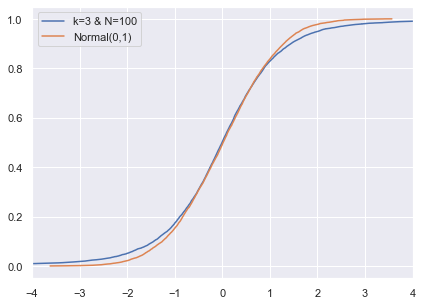

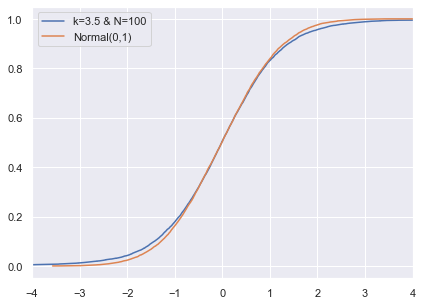

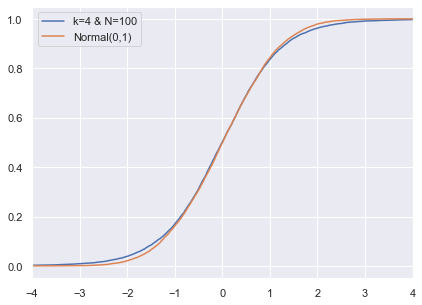

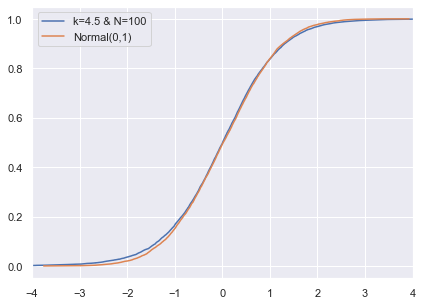

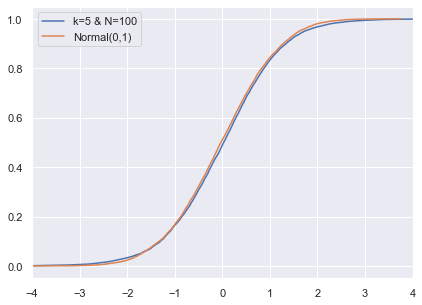

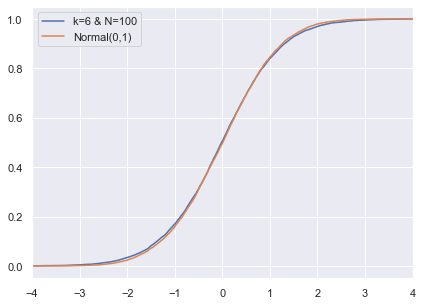

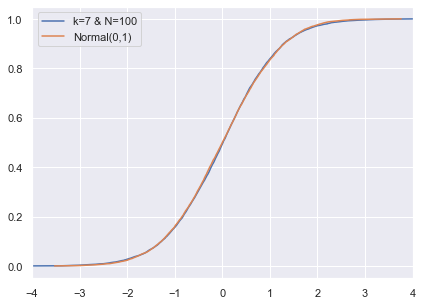

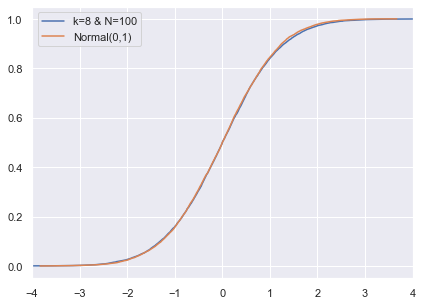

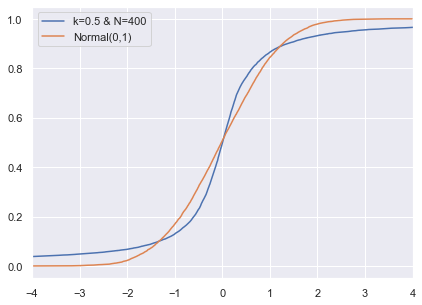

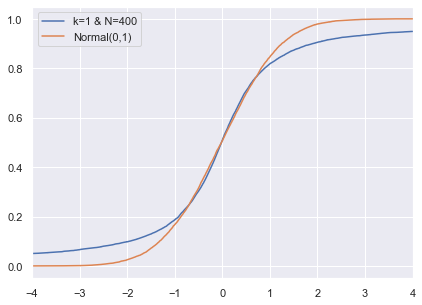

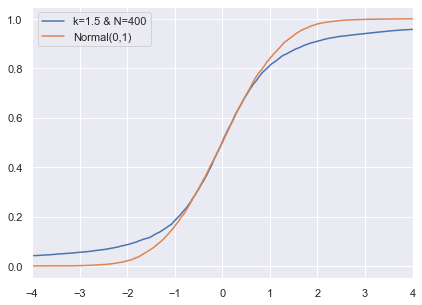

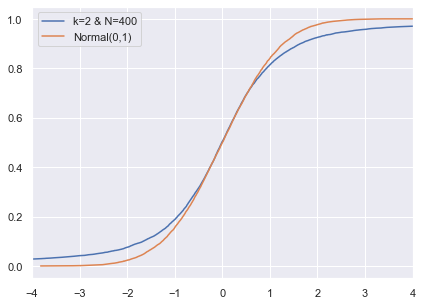

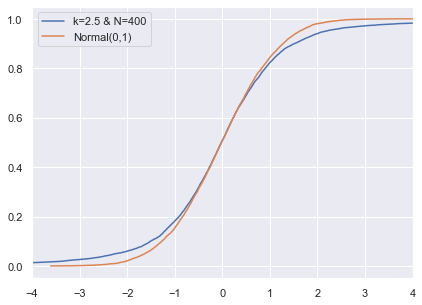

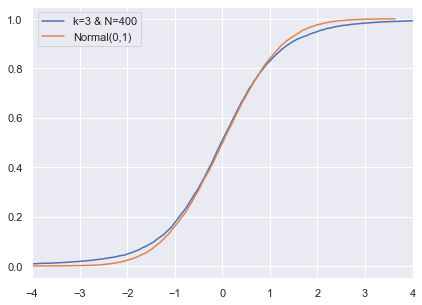

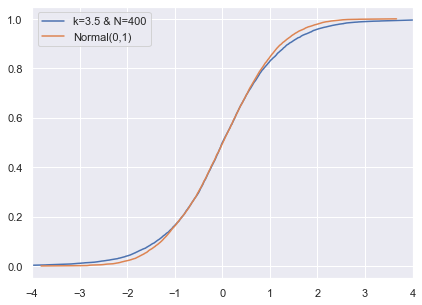

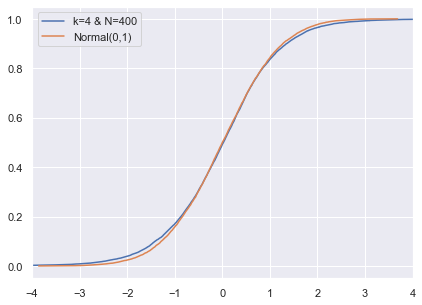

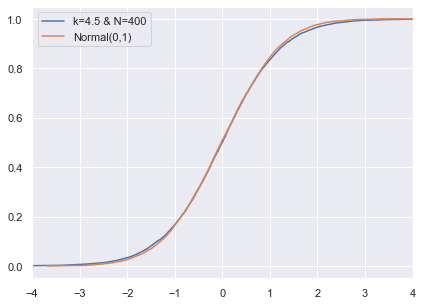

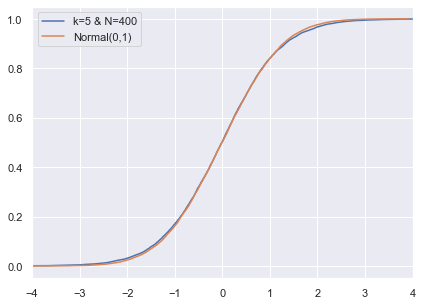

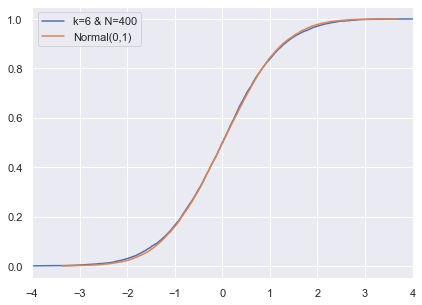

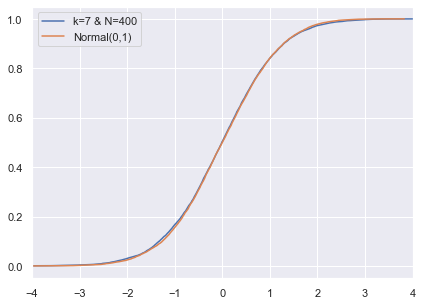

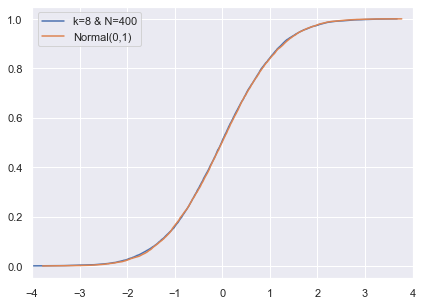

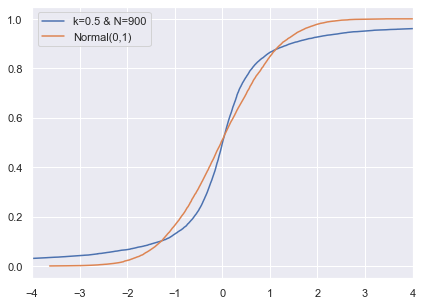

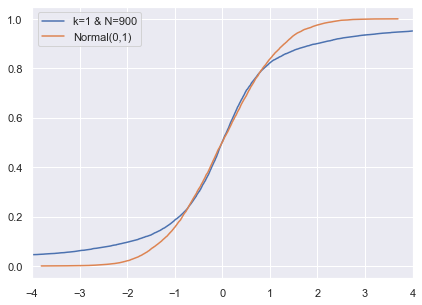

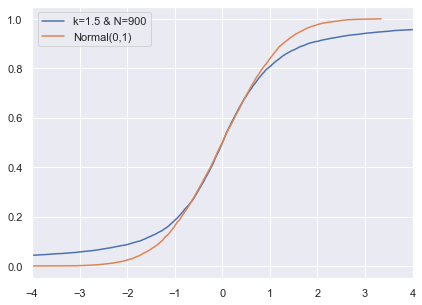

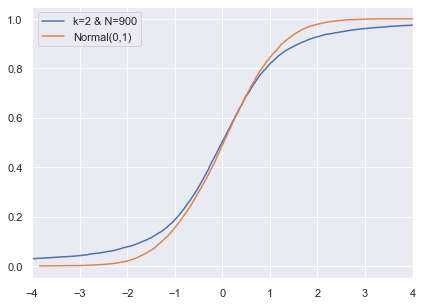

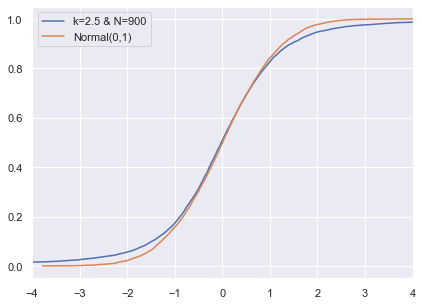

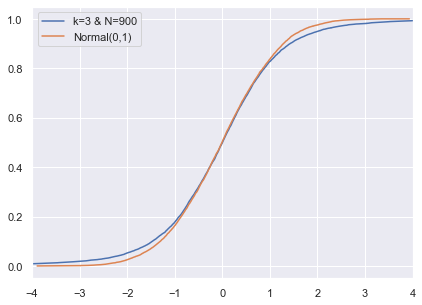

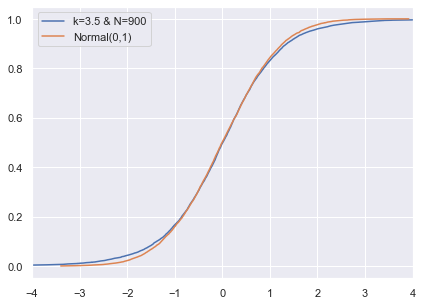

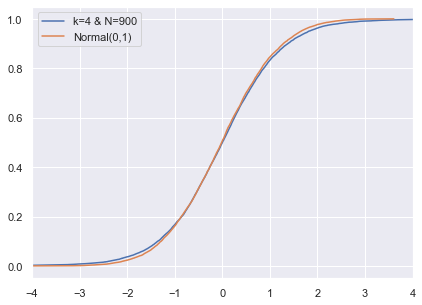

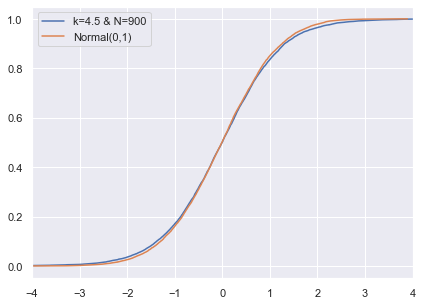

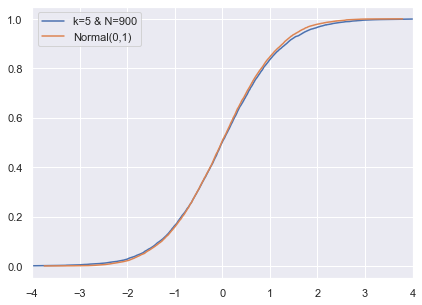

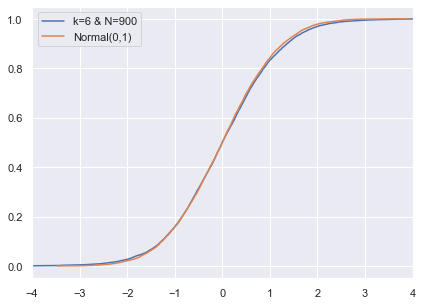

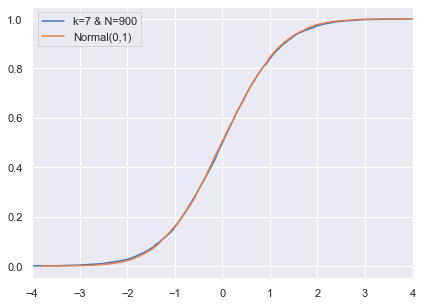

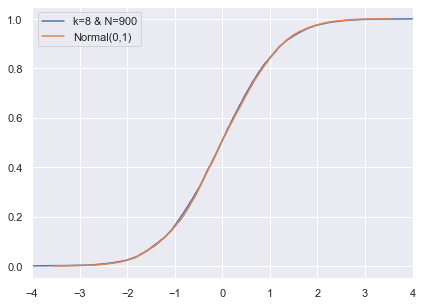

In [137]:
for n in Ns:
    for k in Ks:
        get_plot_3(k, n)